In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import *
from utils.model import *

# Read data

In [2]:
y = read_target_train()

# Preprocess data

In [3]:
X, X_test = read_preprocessed_data()

In [4]:
# X.select_dtypes(['bool'])
len(get_cat_features_list(X_test))

29

# Train catboost

In [5]:
from catboost import CatBoostRegressor

In [6]:
get_cat_features_list(X)

['Завалка лома_gr',
 'Заливка чугуна_gr',
 'Продувка_gr',
 'Наведение гарнисажа_gr',
 'Осмотр конвертера_gr',
 'Отсутствие чугуна_gr',
 'Обрыв горловины_gr',
 'Наложение продувки_gr',
 'Вхождение в гр.МНЛЗ_gr',
 'Полусухое торкрет._gr',
 'Отсутствие O2_gr',
 'Неиспр. электр. обор_gr',
 'Подварка  футеровки_gr',
 'Ожидание стальковша_gr',
 'Замер положения фурм_gr',
 'Неиспр. механ. обор._gr',
 'Отсутствие мет.шихты_gr',
 'Замена фурмы_gr',
 'ППР_gr',
 'Ожидание шл.чаш_gr',
 'Отсут. своб.разл.пл._gr',
 'Ремонт летки_gr',
 'Неиспр. энерг. обор_gr',
 'Неиспр. АСУ и КИПиА_gr',
 'plavka_NMZ',
 'plavka_NAPR_ZAD',
 'plavka_TIPE_FUR',
 'plavka_TIPE_GOL',
 'cluster_label']

In [60]:
model_tst = CatBoostRegressor(iterations = 600, verbose = 50, depth = 3, random_state = config['random_state'], cat_features=get_cat_features_list(X), loss_function='MAE')
model_C = CatBoostRegressor(iterations = 600, verbose = 50, depth = 3, random_state = config['random_state'], cat_features=get_cat_features_list(X), loss_function='MAE')

In [61]:
model_tst.fit(X, y['TST'])

0:	learn: 23.6805807	total: 16.1ms	remaining: 9.62s
50:	learn: 18.5486397	total: 787ms	remaining: 8.47s
100:	learn: 17.2510113	total: 1.56s	remaining: 7.69s
150:	learn: 16.4938801	total: 2.32s	remaining: 6.89s
200:	learn: 15.9023896	total: 3.07s	remaining: 6.09s
250:	learn: 15.3837650	total: 3.83s	remaining: 5.33s
300:	learn: 14.8903103	total: 4.58s	remaining: 4.55s
350:	learn: 14.4347743	total: 5.34s	remaining: 3.79s
400:	learn: 14.0692840	total: 6.1s	remaining: 3.03s
450:	learn: 13.7458546	total: 6.86s	remaining: 2.27s
500:	learn: 13.4499156	total: 7.61s	remaining: 1.5s
550:	learn: 13.1931598	total: 8.37s	remaining: 745ms
599:	learn: 12.9599174	total: 9.12s	remaining: 0us


In [62]:
model_C.fit(X, y['C'])

0:	learn: 0.0386671	total: 16.6ms	remaining: 9.96s
50:	learn: 0.0312395	total: 798ms	remaining: 8.59s
100:	learn: 0.0276866	total: 1.56s	remaining: 7.73s
150:	learn: 0.0236960	total: 2.31s	remaining: 6.88s
200:	learn: 0.0219146	total: 3.07s	remaining: 6.09s
250:	learn: 0.0210261	total: 3.82s	remaining: 5.31s
300:	learn: 0.0204296	total: 4.57s	remaining: 4.54s
350:	learn: 0.0199816	total: 5.32s	remaining: 3.78s
400:	learn: 0.0197101	total: 6.08s	remaining: 3.02s
450:	learn: 0.0194412	total: 6.84s	remaining: 2.26s
500:	learn: 0.0192616	total: 7.63s	remaining: 1.51s
550:	learn: 0.0190247	total: 8.39s	remaining: 746ms
599:	learn: 0.0188545	total: 9.14s	remaining: 0us


In [ ]:
# X_T_copy = X.copy()
# X_T_copy['TST'] = model_tst.predict(X)

In [63]:
save_catboost_models(model_tst, model_C)

<BarContainer object of 15 artists>

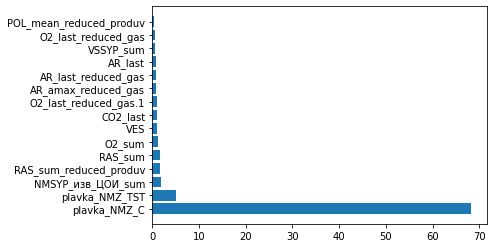

In [64]:
args = model_C.feature_importances_.argsort()[::-1][:15]
plt.barh(np.array(model_C.feature_names_)[args], model_C.feature_importances_[args]) 


In [36]:
set(X_test['plavka_NMZ'].values)

{'08YU.z02/ЭТ    ',
 '09Г2С          ',
 '09Г2С.16       ',
 '20             ',
 '25Г2С          ',
 '28С            ',
 '28С.2          ',
 '35ГС           ',
 '3SP.z23/ЭТ     ',
 '3SP.z24/ЭТ     ',
 '4SP.z08/ЭТ     ',
 '5SP.z24/ЭТ     ',
 'C071TM.z01/ЭТ  ',
 'C091TM.z01/ЭТ  ',
 'C121TM/ЭТ      ',
 'GR60.z06/ЭТ    ',
 'SC2/ЭТ         ',
 'SC2M/ЭТ        ',
 'СТ3ГПС.8       ',
 'СТ3ГСП.2       ',
 'СТ3ГСП.4       ',
 'СТ3ПС.6        ',
 'СТ3ПС.7        ',
 'Ст1кп          ',
 'Ст1пс          ',
 'Ст1пс.z05/ЭТ   ',
 'Ст2пс          ',
 'Ст3Гпс         ',
 'Ст3пс          ',
 'Ст3пс/Э        ',
 'Ст3сп          ',
 'Ст3сп/Т        ',
 'Ст3сп/Э        ',
 'Ст3сп/ЭТ       ',
 'Ст4сп          ',
 'Ст4сп/ЭТ       ',
 'Ст5сп          ',
 'Ш2.1           ',
 'Ш2.3           '}

In [59]:
from catboost import Pool, cv

cv_data = X

labels = y['TST']

cat_features = get_cat_features_list(X)

cv_dataset = Pool(data=cv_data,
                  label=labels,
                  cat_features=cat_features)

params = {"iterations": 1200,
          "depth": 3,
          "loss_function": "MAE",
          'grow_policy': 'Lossguide',
          "verbose": 50}

scores = cv(cv_dataset,
            params,
            fold_count=4,
            plot="True")

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1599.5834510	test: 1599.6304130	best: 1599.6304130 (0)
50:	learn: 346.9981061	test: 347.3661793	best: 347.3661793 (50)
100:	learn: 74.4867882	test: 74.8809454	best: 74.8809454 (100)
150:	learn: 24.5047020	test: 25.3216333	best: 25.3216333 (150)
200:	learn: 17.3811731	test: 18.7497675	best: 18.7497675 (200)
250:	learn: 15.6541971	test: 17.5896800	best: 17.5896800 (250)
300:	learn: 14.5829770	test: 17.1217139	best: 17.1217139 (300)	total: 34.2s	remaining: 1m 42s
350:	learn: 13.7762880	test: 16.8494539	best: 16.8494539 (350)
400:	learn: 13.1426713	test: 16.6421113	best: 16.6421113 (400)
450:	learn: 12.6309103	test: 16.5105297	best: 16.5105297 (450)
500:	learn: 12.2130224	test: 16.4041090	best: 16.4041090 (500)
550:	learn: 11.8752608	test: 16.3308717	best: 16.3304839 (548)
600:	learn: 11.5418254	test: 16.2544516	best: 16.2544516 (600)
650:	learn: 11.2588215	test: 16.1963595	best: 16.1963595 (650)
700:	learn: 11.0069660	test: 16.1398686	best: 16.1398686 (700)
750:	learn: 10.785562

In [50]:
from catboost import Pool, cv

cv_data = X

labels = y['C']

cat_features = get_cat_features_list(X)

cv_dataset = Pool(data=cv_data,
                  label=labels,
                  cat_features=cat_features)

params = {"iterations": 1200,
          "depth": 4,
#           "l2_leaf_reg" : 4,
          "loss_function": "MAE",
          "verbose": 50}

scores = cv(cv_dataset,
            params,
            fold_count=4, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0806784	test: 0.0806811	best: 0.0806811 (0)
50:	learn: 0.0388708	test: 0.0390668	best: 0.0390668 (50)
100:	learn: 0.0304531	test: 0.0310770	best: 0.0310770 (100)
150:	learn: 0.0261900	test: 0.0274867	best: 0.0274867 (150)
200:	learn: 0.0228071	test: 0.0250227	best: 0.0250227 (200)
250:	learn: 0.0203139	test: 0.0234344	best: 0.0234344 (250)
300:	learn: 0.0190515	test: 0.0228107	best: 0.0228107 (300)
350:	learn: 0.0183360	test: 0.0226265	best: 0.0226265 (350)
400:	learn: 0.0178160	test: 0.0224804	best: 0.0224788 (398)
450:	learn: 0.0174227	test: 0.0224245	best: 0.0224245 (450)
500:	learn: 0.0169999	test: 0.0223082	best: 0.0223066 (499)
550:	learn: 0.0166461	test: 0.0222499	best: 0.0222499 (550)
600:	learn: 0.0163142	test: 0.0222513	best: 0.0222445 (561)	total: 59.9s	remaining: 59.7s
650:	learn: 0.0160087	test: 0.0222088	best: 0.0222016 (639)
700:	learn: 0.0157426	test: 0.0221776	best: 0.0221776 (700)
750:	learn: 0.0154929	test: 0.0221343	best: 0.0221296 (748)
800:	learn: 0.01